# 케라스를 사용한 인공 신경망

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-시퀀셜-API를-사용하여-이미지-분류기-만들기" data-toc-modified-id="1.-시퀀셜-API를-사용하여-이미지-분류기-만들기-1">1. 시퀀셜 API를 사용하여 이미지 분류기 만들기</a></span></li></ul></div>

## 1. 시퀀셜 API를 사용하여 이미지 분류기 만들기

In [2]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__, '\t', keras.__version__)

2.3.0 	 2.4.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
class_names[y_train[0]]

'Coat'

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [17]:
# 위와 동일
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense_9'

In [22]:
model.get_layer('dense_9') is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[ 0.07351454, -0.04947006, -0.02372055, ...,  0.04406505,
         0.01367044, -0.02844034],
       [ 0.06716119, -0.06780352,  0.03992105, ...,  0.01029989,
        -0.05420005,  0.03348946],
       [-0.03572524,  0.03379572,  0.04467332, ...,  0.0498566 ,
        -0.04484062, -0.0249346 ],
       ...,
       [ 0.01804365, -0.00310533, -0.06795605, ..., -0.07257941,
         0.00565158, -0.03981419],
       [ 0.03543888,  0.01754469, -0.04519384, ...,  0.02524554,
        -0.03505094,  0.00473297],
       [-0.02111961, -0.02031424,  0.03207351, ..., -0.0171173 ,
         0.05478621,  0.0711848 ]], dtype=float32)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [27]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7062 - accuracy: 0.7668 - val_loss: 0.5094 - val_accuracy: 0.8280
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4880 - accuracy: 0.8305 - val_loss: 0.4402 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4439 - accuracy: 0.8449 - val_loss: 0.4383 - val_accuracy: 0.8514
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4180 - accuracy: 0.8544 - val_loss: 0.4381 - val_accuracy: 0.8454
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3977 - accuracy: 0.8601 - val_loss: 0.3863 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3823 - accuracy: 0.8648 - val_loss: 0.3830 - val_accuracy: 0.8668
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3678 - accuracy: 0.8697 - val_loss: 0.3666 - val_accuracy:

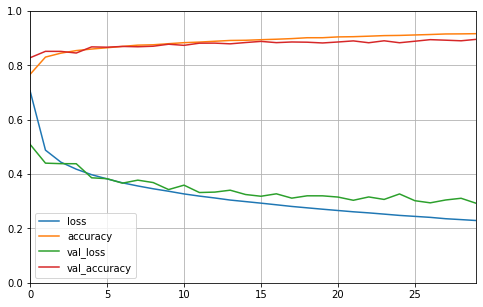

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.8851


[0.32742592692375183, 0.8851000070571899]

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [42]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [44]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [45]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)